<a href="https://colab.research.google.com/github/dgansen/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



## Function

In [0]:
# WRITE A BAYESIAN FUNCTION -- 1
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  denom = (true_positive_rate - false_positive_rate)*prob_drunk_prior + false_positive_rate*(1-prob_drunk_prior)
  return true_positive_rate * prob_drunk_prior / denom

In [0]:
#Probability based on one pos. test
prob_drunk_given_positive(0.001, 0.08, 1)

0.012370113805047005

In [0]:
#Probability based on two pos. tests
prob_drunk_given_positive(0.012370113805047005, 0.08, 1)

0.13685132472082331

In [0]:
# 3 tests
prior2 = 0.13812154696132597
prior3 = prob_drunk_given_positive(prior2, 0.08, 1)
print(prior3)

0.7046223224351748


In [0]:
# 4 tests
prior4 = prob_drunk_given_positive(prior3, 0.08, 1)
print(prior4)

1.0487281025572186


## Bayes Confidence Interval

In [0]:
import pandas as pd

In [0]:
#import data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
cols = ['party','handicapped-infants','water-project-cost-sharing',
        'adoption-of-the-budget-resolution','physician-fee-freeze',
        'el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',
        'aid-to-nicaraguan-contras','mx-missile','immigration',
        'synfuels-corporation-cutback','education-spending',
        'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
#Set Yes votes to True and all else to False
df = pd.read_csv(url,names=cols,true_values='y',false_values={'n','?'})

In [0]:
df.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,False,False,True,False,False,True,True,True,False,False,False,False,False,True,False,True
freq,267,248,240,253,258,223,272,239,242,228,219,285,264,226,248,261,269


In [0]:
#Construct dataframe of the yes vote tallies by party
dem_yes = df[df['party']=='democrat'][cols[1:]].sum()
rep_yes = df[df['party']=='republican'][cols[1:]].sum()
yes_votes = pd.DataFrame(dem_yes,columns=['Dem'])
yes_votes['Rep'] = rep_yes
yes_votes.reset_index(drop=True,inplace=True)
yes_votes

,Dem,Rep
0,156,31
1,120,75
2,231,22
3,14,163
4,55,157
5,123,149
6,200,39
7,218,24
8,188,19
9,124,92


In [0]:
from scipy import stats
import seaborn as sns
import numpy as np

In [0]:
#Find Bayesian Confidence Interval for each, compare to Frequentist
DMean, Variance, Std_dev = stats.bayes_mvs(dem_yes,alpha=0.95)
Dinterval = DMean.statistic - DMean.minmax[0]
print('Democrat Bayesian Mean/Interval:\n',DMean)

FD_minmax = stats.norm.interval(0.95,loc=np.mean(dem_yes),scale=stats.sem(dem_yes))
print('Democrat Frequentist Mean/Interval\nMean: ',np.mean(dem_yes),FD_minmax)

Democrat Bayesian Mean/Interval:
 Mean(statistic=130.625, minmax=(96.20694313342467, 165.04305686657534))
Democrat Frequentist Mean/Interval
Mean:  130.625 (98.97604447258348, 162.27395552741652)


In [0]:
RMean, Variance, Std_dev = stats.bayes_mvs(rep_yes,alpha=0.95)
Rinterval = RMean.statistic - RMean.minmax[0]
print('Republican Bayesian Mean/Interval:\n',RMean)

FR_minmax = stats.norm.interval(0.95,loc=np.mean(rep_yes),scale=stats.sem(rep_yes))
print('Republican Frequentist Mean/Interval\nMean: ',np.mean(rep_yes),FR_minmax)

Republican Bayesian Mean/Interval:
 Mean(statistic=83.1875, minmax=(51.74517610705065, 114.62982389294935))
Republican Frequentist Mean/Interval
Mean:  83.1875 (54.27486514602674, 112.10013485397326)


## Visualize Bayesian/Frequentist Intervals

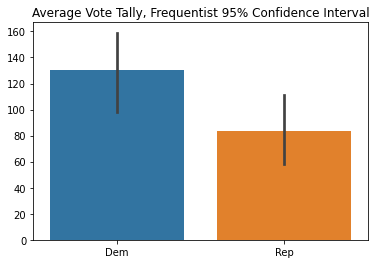

In [0]:
ax = sns.barplot(data=yes_votes,ci=95)
ax.set_title('Average Vote Tally, Frequentist 95% Confidence Interval');

Text(0.5, 1.0, 'Average Vote Tally, Bayesian 95% Confidence Interval')

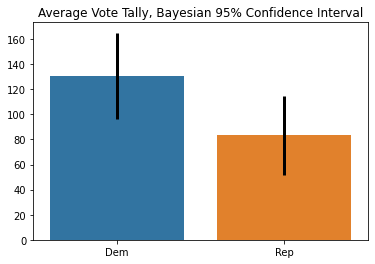

In [0]:
ax = sns.barplot(x=['Dem','Rep'],y=[DMean.statistic, RMean.statistic],yerr=[Dinterval,Rinterval],
                 error_kw={'elinewidth':3})
ax.set_title('Average Vote Tally, Bayesian 95% Confidence Interval')

Not a ton of difference, aside from the Republican Bayesian interval being a couple of votes wider.

## Describe Difference Overall
The Bayesian approach seems to inform its conclusions differently based on other members of the dataset, similar to computing the median versus mean. Where Frequentist methods might describe a likelihood based on the current instance of data, a Bayesian one would expand to preconceived, fuzzier notions of what the data would overall look like.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!